## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [1]:
import pandas as pd

<Axes: title={'center': 'chrome search performance in 2009, 2012, 2015 & 2018'}>

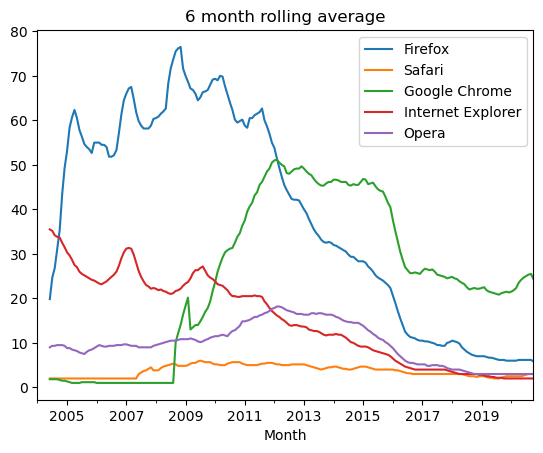

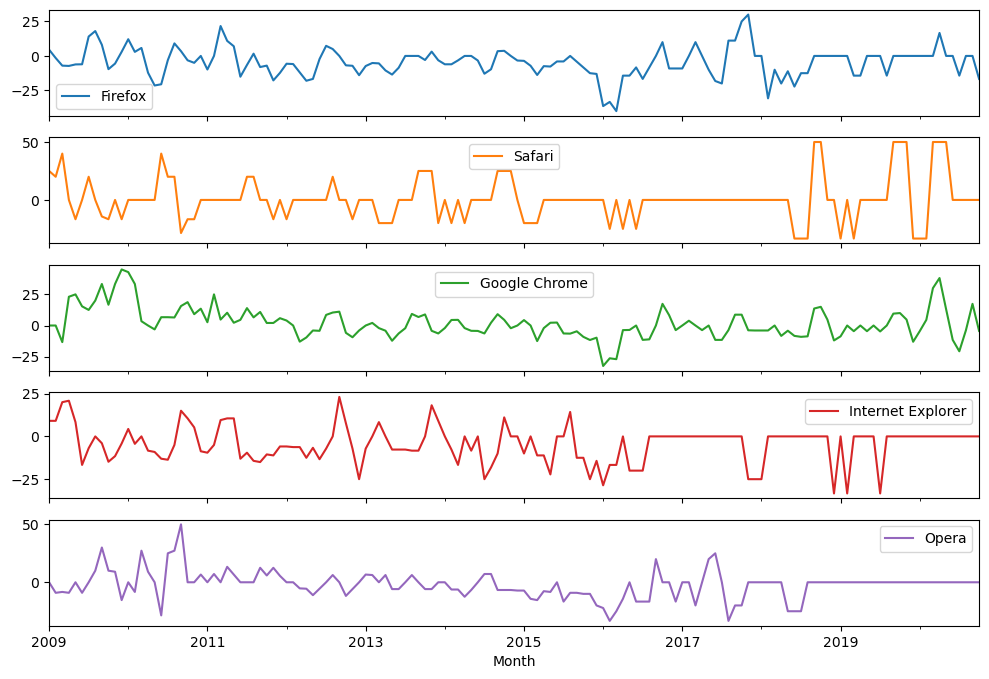

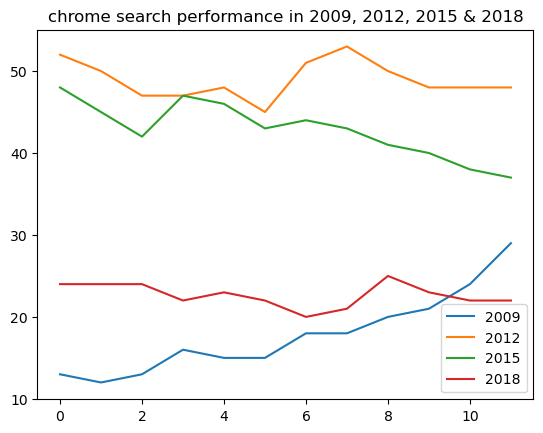

In [2]:
# load the dataset and parse dates for the month column
df = pd.read_csv("datasets/worldwide_browser_trends.csv", parse_dates=['Month'], index_col='Month')

# calculate the six-month rolling average
rolling_six = df.rolling(window=6).mean()

# display the first ten values and plot the rolling average
rolling_six.plot(title="6 month rolling average")

# calculate the percentage change from the previous quarter
pct_change_quarterly = df.pct_change(periods=3) * 100  # convert to percentage
pct_change_quarterly = pct_change_quarterly.loc['2009':]  # filter for years from 2009 onwards

# display the first ten values and create subplots for visualization
pct_change_quarterly.plot(subplots=True, figsize=(12, 8))

# create a DataFrame to hold annual Google Trends data for specific years
chrome_trends = pd.DataFrame()

# extract data for each specified year and combine into a single DataFrame
for year in ['2009', '2012', '2015', '2018']:
    chrome_data = df.loc[year, ['Google Chrome']]  # keep the DataFrame structure
    chrome_trends[year] = chrome_data.values.flatten()  # flatten to 1D array and assign

# preview the trends data and plot the results
chrome_trends.plot(title="chrome search performance in 2009, 2012, 2015 & 2018")
